A notebook to explore plotting drift trajectories.

In [1]:
#Example of loading modules from drift tool
from driftutils import plot_trajectories

import matplotlib.pyplot as plt
import xarray as xr
import glob
import os

%matplotlib inline

# Look up files

In [2]:
results_dir='/data/data1/OPP/drifters/drift_tool_runs/tests/salish_test_20170410/output/'
# Use glob to find all netcdf files in results_dir
files = glob.glob(os.path.join(results_dir, '*.nc'))

In [3]:
files

['/data/data1/OPP/drifters/drift_tool_runs/tests/salish_test_20170410/output/salishseacast_ar_2017041100_P1D-135_1491850504.nc',
 '/data/data1/OPP/drifters/drift_tool_runs/tests/salish_test_20170410/output/salishseacast_ar_2017041000_P1D-635_1491726721.nc',
 '/data/data1/OPP/drifters/drift_tool_runs/tests/salish_test_20170410/output/salishseacast_ar_2017041100_P1D-131_1491850200.nc',
 '/data/data1/OPP/drifters/drift_tool_runs/tests/salish_test_20170410/output/salishseacast_ar_2017041000_P1D-632_1491747090.nc',
 '/data/data1/OPP/drifters/drift_tool_runs/tests/salish_test_20170410/output/salishseacast_ar_2017041100_P1D-635_1491726721.nc',
 '/data/data1/OPP/drifters/drift_tool_runs/tests/salish_test_20170410/output/salishseacast_ar_2017041100_P1D-132_1491850313.nc',
 '/data/data1/OPP/drifters/drift_tool_runs/tests/salish_test_20170410/output/salishseacast_ar_2017041100_P1D-632_1491747090.nc',
 '/data/data1/OPP/drifters/drift_tool_runs/tests/salish_test_20170410/output/salishseacast_ar_201

# Open first file

In [4]:
file = files[0]
# Open dataset
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:       (time: 145)
Coordinates:
  * time          (time) datetime64[ns] 2017-04-11T00:04:06.999998 ...
Data variables:
    obs_lat       (time) float64 49.18 49.18 49.19 49.19 49.19 49.2 49.2 ...
    obs_lon       (time) float64 -123.5 -123.5 -123.5 -123.5 -123.5 -123.5 ...
    mod_lat       (time) float64 49.18 49.18 49.19 49.19 49.19 49.19 49.19 ...
    mod_lon       (time) float64 -123.5 -123.5 -123.5 -123.5 -123.5 -123.5 ...
    obs_offShore  (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    liu           (time) float64 0.0 0.4827 0.3581 0.165 0.0 0.0 0.0 0.0 0.0 ...
    molcard       (time) float64 0.0 0.6979 0.6233 0.5989 0.5945 0.6007 ...
    sep           (time) float64 77.2 108.7 264.8 417.6 550.7 668.0 773.3 ...
    obs_dist      (time) float64 0.0 359.3 342.7 337.7 316.6 315.0 256.8 ...
    obs_disp      (time) float64 0.0 359.7 702.9 1.041e+03 1.358e+03 ...
    mod_dist      (time) float64 0.0 242.6 241.8 241.4 243.4 256.8 216.5 

# Plot first file

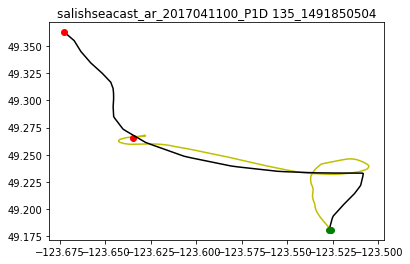

In [5]:
fig, ax = plt.subplots(1,1)
ax.plot(ds.obs_lon.values, ds.obs_lat.values, c='y', label='observations')
ax.plot(ds.obs_lon.values[0], ds.obs_lat.values[0], 'go')
ax.plot(ds.obs_lon.values[-1], ds.obs_lat.values[-1], 'ro')
ax.plot(ds.mod_lon.values, ds.mod_lat.values, c='k', label='model')
ax.plot(ds.mod_lon.values[0], ds.mod_lat.values[0], 'go')
ax.plot(ds.mod_lon.values[-1], ds.mod_lat.values[-1], 'ro')
ax.set_title('{} {}'.format(ds.mod_run_name, ds.obs_buoyid))


In [6]:
ds.close()

# Plot all files

In [7]:
def plot_file(fname):
    """Plot the modelled and observed trajector in a file fname"""
    ds = xr.open_dataset(fname)
    fig, ax = plt.subplots(1,1)
    ax.plot(ds.obs_lon.values, ds.obs_lat.values, c='y', label='observations')
    ax.plot(ds.obs_lon.values[0], ds.obs_lat.values[0], 'go')
    ax.plot(ds.obs_lon.values[-1], ds.obs_lat.values[-1], 'ro')
    ax.plot(ds.mod_lon.values, ds.mod_lat.values, c='k', label='model')
    ax.plot(ds.mod_lon.values[0], ds.mod_lat.values[0], 'go')
    ax.plot(ds.mod_lon.values[-1], ds.mod_lat.values[-1], 'ro')
    ax.set_title('{} {}'.format(ds.mod_run_name, ds.obs_buoyid))
    ds.close()
    return fig

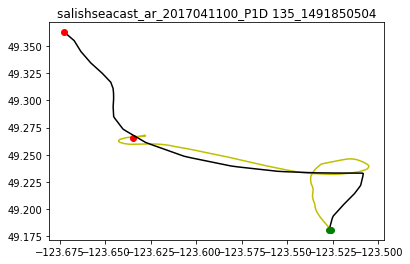

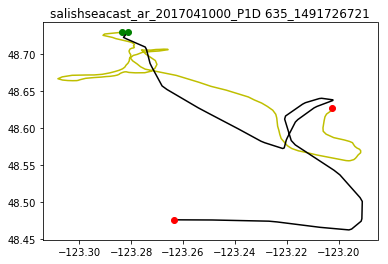

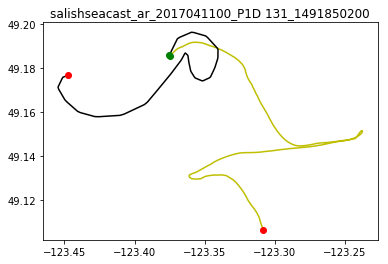

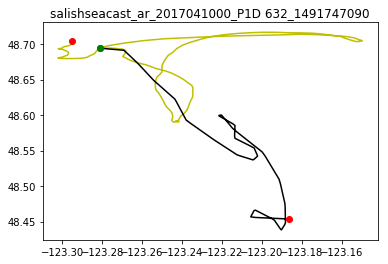

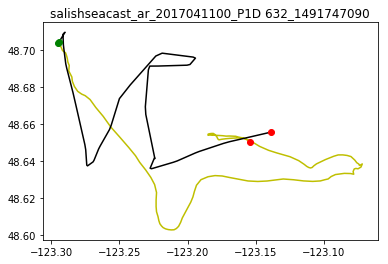

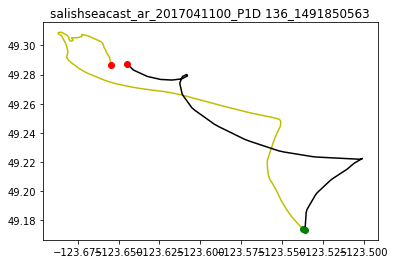

In [8]:
for file in files:
    plot_file(file)